In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json  

In [2]:
data_folder = "data"

json_files = [f for f in os.listdir(data_folder) if f.endswith(".json")]


for json_file in json_files:
    json_path = os.path.join(data_folder, json_file)
    
    
    with open(json_path, "r") as file:
        data = json.load(file)
    
    forex_data = data.get("Time Series FX (Daily)", {})
    
    df = pd.DataFrame.from_dict(forex_data, orient="index")
    df.index.name = "Date"
    
    df.columns = ["Open", "High", "Low", "Close"]
    df = df.astype(float)
    
    csv_filename = json_file.replace(".json", ".csv")
    csv_path = os.path.join(data_folder, csv_filename)
    
    df.to_csv(csv_path)
    
    print(f"Converted {json_file} to {csv_filename}")

print("All JSON files converted to CSV successfully!")


Converted historical_EUR_EGP.json to historical_EUR_EGP.csv
Converted historical_EUR_USD.json to historical_EUR_USD.csv
Converted historical_USD_EGP.json to historical_USD_EGP.csv
All JSON files converted to CSV successfully!


# test Viz

In [13]:
data_folder = "data"
usd_egp = pd.read_csv(f"{data_folder}/historical_USD_EGP.csv", parse_dates=True)
eur_egp = pd.read_csv(f"{data_folder}/historical_EUR_EGP.csv" ,parse_dates=True)
eur_usd = pd.read_csv(f"{data_folder}/historical_EUR_USD.csv" ,parse_dates=True)


In [14]:
usd_egp

,Date,Open,High,Low,Close
0,2025-03-07,50.63,50.640,50.63,50.63
1,2025-03-06,50.62,50.630,50.62,50.63
2,2025-03-05,50.58,50.700,50.53,50.62
3,2025-03-04,50.60,50.680,50.54,50.59
4,2025-03-03,50.60,50.661,50.54,50.60
...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15
2674,2014-11-12,7.15,7.150,7.13,7.15
2675,2014-11-11,7.15,7.150,7.15,7.15
2676,2014-11-10,7.15,7.150,7.13,7.15


In [15]:
usd_egp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [18]:


# Convert the date column to datetime format
usd_egp['Date'] = pd.to_datetime(usd_egp['Date'])

# Extract year, month, and day into new columns
usd_egp['year'] = usd_egp['Date'].dt.year
usd_egp['month'] = usd_egp['Date'].dt.month
usd_egp['day'] = usd_egp['Date'].dt.day

# Display the DataFrame
print(usd_egp['Date'])


0      2025-03-07
1      2025-03-06
2      2025-03-05
3      2025-03-04
4      2025-03-03
          ...    
2673   2014-11-13
2674   2014-11-12
2675   2014-11-11
2676   2014-11-10
2677   2014-11-07
Name: Date, Length: 2678, dtype: datetime64[ns]


In [19]:
usd_egp

,Date,Open,High,Low,Close,year,month,day
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3
...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10


In [20]:
usd_egp['month_name'] = usd_egp['Date'].dt.month_name()

In [21]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7,March
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6,March
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5,March
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4,March
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3,March
...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13,November
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12,November
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11,November
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10,November


### 1️⃣ Exponential Moving Average (EMA)

In [23]:
usd_egp['EMA_12'] = usd_egp['Close'].ewm(span=12, adjust=False).mean()
usd_egp['EMA_26'] = usd_egp['Close'].ewm(span=26, adjust=False).mean()

In [24]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name,EMA_12,EMA_26
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7,March,50.630000,50.630000
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6,March,50.630000,50.630000
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5,March,50.628462,50.629259
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4,March,50.622544,50.626351
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3,March,50.619076,50.624399
...,...,...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13,November,7.148919,7.158431
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12,November,7.149086,7.157806
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11,November,7.149226,7.157228
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10,November,7.149345,7.156693


### 2️⃣ Relative Strength Index (RSI)

In [25]:
window = 14
delta = usd_egp['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
RS = gain / loss
usd_egp['RSI_14'] = 100 - (100 / (1 + RS))

In [26]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name,EMA_12,EMA_26,RSI_14
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7,March,50.630000,50.630000,NaN
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6,March,50.630000,50.630000,NaN
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5,March,50.628462,50.629259,NaN
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4,March,50.622544,50.626351,NaN
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3,March,50.619076,50.624399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13,November,7.148919,7.158431,50.0
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12,November,7.149086,7.157806,50.0
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11,November,7.149226,7.157228,50.0
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10,November,7.149345,7.156693,100.0


### 3️⃣ Bollinger Bands

In [28]:
window = 20
usd_egp['SMA_20'] = usd_egp['Close'].rolling(window=window).mean()
usd_egp['std_20'] = usd_egp['Close'].rolling(window=window).std()
usd_egp['Upper_Band'] = usd_egp['SMA_20'] + (2 * usd_egp['std_20'])
usd_egp['Lower_Band'] = usd_egp['SMA_20'] - (2 * usd_egp['std_20'])

In [29]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name,EMA_12,EMA_26,RSI_14,SMA_20,std_20,Upper_Band,Lower_Band
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7,March,50.630000,50.630000,NaN,NaN,NaN,NaN,NaN
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6,March,50.630000,50.630000,NaN,NaN,NaN,NaN,NaN
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5,March,50.628462,50.629259,NaN,NaN,NaN,NaN,NaN
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4,March,50.622544,50.626351,NaN,NaN,NaN,NaN,NaN
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3,March,50.619076,50.624399,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13,November,7.148919,7.158431,50.0,7.148,0.005231,7.158463,7.137537
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12,November,7.149086,7.157806,50.0,7.148,0.005231,7.158463,7.137537
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11,November,7.149226,7.157228,50.0,7.148,0.005231,7.158463,7.137537
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10,November,7.149345,7.156693,100.0,7.148,0.005231,7.158463,7.137537


In [31]:
usd_egp.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
year           0
month          0
day            0
month_name     0
EMA_12         0
EMA_26         0
RSI_14        31
SMA_20        19
std_20        19
Upper_Band    19
Lower_Band    19
dtype: int64

### 4️⃣ Moving Average Convergence Divergence (MACD)

In [32]:
usd_egp['MACD'] = usd_egp['EMA_12'] - usd_egp['EMA_26']
usd_egp['Signal_Line'] = usd_egp['MACD'].ewm(span=9, adjust=False).mean()


In [33]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name,EMA_12,EMA_26,RSI_14,SMA_20,std_20,Upper_Band,Lower_Band,MACD,Signal_Line
0,2025-03-07,50.63,50.640,50.63,50.63,2025,3,7,March,50.630000,50.630000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2025-03-06,50.62,50.630,50.62,50.63,2025,3,6,March,50.630000,50.630000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,2025-03-05,50.58,50.700,50.53,50.62,2025,3,5,March,50.628462,50.629259,NaN,NaN,NaN,NaN,NaN,-0.000798,-0.000160
3,2025-03-04,50.60,50.680,50.54,50.59,2025,3,4,March,50.622544,50.626351,NaN,NaN,NaN,NaN,NaN,-0.003807,-0.000889
4,2025-03-03,50.60,50.661,50.54,50.60,2025,3,3,March,50.619076,50.624399,NaN,NaN,NaN,NaN,NaN,-0.005323,-0.001776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.150,7.13,7.15,2014,11,13,November,7.148919,7.158431,50.0,7.148,0.005231,7.158463,7.137537,-0.009511,-0.014498
2674,2014-11-12,7.15,7.150,7.13,7.15,2014,11,12,November,7.149086,7.157806,50.0,7.148,0.005231,7.158463,7.137537,-0.008721,-0.013343
2675,2014-11-11,7.15,7.150,7.15,7.15,2014,11,11,November,7.149226,7.157228,50.0,7.148,0.005231,7.158463,7.137537,-0.008002,-0.012275
2676,2014-11-10,7.15,7.150,7.13,7.15,2014,11,10,November,7.149345,7.156693,100.0,7.148,0.005231,7.158463,7.137537,-0.007347,-0.011289


### 5️⃣ Average True Range (ATR)

In [36]:
usd_egp['TR'] = usd_egp[['High', 'Low', 'Close']].apply(lambda row: max(
    row['High'] - row['Low'],
    abs(row['High'] - row['Close']),
    abs(row['Low'] - row['Close'])
), axis=1)

In [38]:
usd_egp['ATR_14'] = usd_egp['TR'].ewm(span=14, adjust=False).mean()

In [41]:
usd_egp

,Date,Open,High,Low,Close,year,month,day,month_name,EMA_12,EMA_26,RSI_14,SMA_20,std_20,Upper_Band,Lower_Band,MACD,Signal_Line,TR,ATR_14
19,2025-02-10,50.23,50.3300,50.20,50.24,2025,2,10,February,50.499774,50.548479,23.529412,50.5520,0.090589,50.733177,50.370823,-0.048705,-0.024306,0.1300,0.142470
20,2025-02-07,50.25,50.2500,50.23,50.25,2025,2,7,February,50.461347,50.526370,23.529412,50.5330,0.110934,50.754868,50.311132,-0.065022,-0.032449,0.0200,0.126140
21,2025-02-06,50.27,50.3200,50.18,50.25,2025,2,6,February,50.428832,50.505898,26.229508,50.5140,0.125085,50.764170,50.263830,-0.077065,-0.041372,0.1400,0.127988
22,2025-02-05,50.25,50.2700,50.25,50.27,2025,2,5,February,50.404397,50.488424,29.032258,50.4965,0.133664,50.763828,50.229172,-0.084027,-0.049903,0.0200,0.113590
23,2025-02-04,50.31,50.3625,50.18,50.26,2025,2,4,February,50.382182,50.471504,26.229508,50.4800,0.141644,50.763289,50.196711,-0.089322,-0.057787,0.1825,0.122778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2014-11-13,7.15,7.1500,7.13,7.15,2014,11,13,November,7.148919,7.158431,50.000000,7.1480,0.005231,7.158463,7.137537,-0.009511,-0.014498,0.0200,0.018643
2674,2014-11-12,7.15,7.1500,7.13,7.15,2014,11,12,November,7.149086,7.157806,50.000000,7.1480,0.005231,7.158463,7.137537,-0.008721,-0.013343,0.0200,0.018824
2675,2014-11-11,7.15,7.1500,7.15,7.15,2014,11,11,November,7.149226,7.157228,50.000000,7.1480,0.005231,7.158463,7.137537,-0.008002,-0.012275,0.0000,0.016314
2676,2014-11-10,7.15,7.1500,7.13,7.15,2014,11,10,November,7.149345,7.156693,100.000000,7.1480,0.005231,7.158463,7.137537,-0.007347,-0.011289,0.0200,0.016805


In [40]:
usd_egp.dropna(inplace=True)

In [42]:
usd_egp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'year', 'month', 'day',
       'month_name', 'EMA_12', 'EMA_26', 'RSI_14', 'SMA_20', 'std_20',
       'Upper_Band', 'Lower_Band', 'MACD', 'Signal_Line', 'TR', 'ATR_14'],
      dtype='object')

In [44]:
!pip install mplfinance


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\ghozy\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




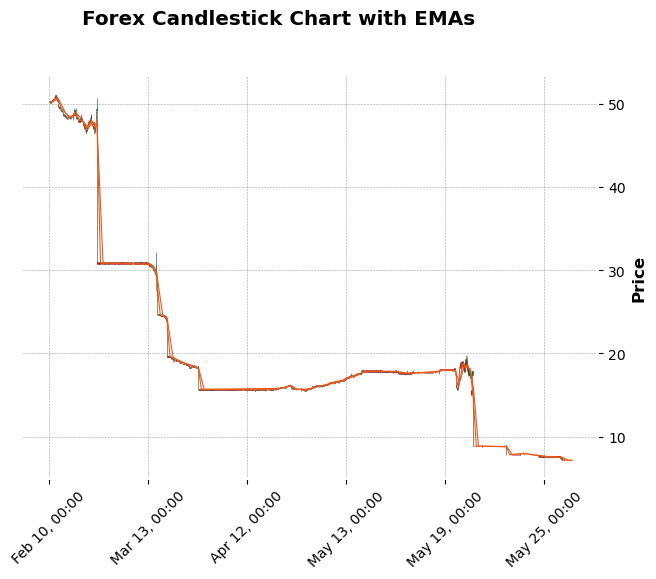

In [51]:
import matplotlib.pyplot as plt
import mplfinance as mpf

usd_egp.set_index('Date', inplace=True)  # Set Date as index

# Create a figure with moving averages
mpf.plot(usd_egp, type='candle', style='charles',
         title="Forex Candlestick Chart with EMAs",
         ylabel="Price",
         mav=(12,26),  # EMA_12 & EMA_26
         volume=False)


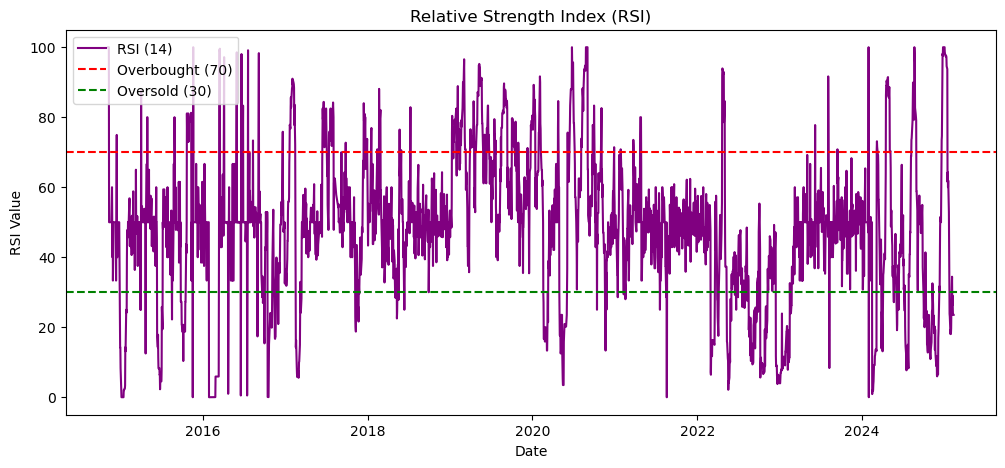

In [47]:
plt.figure(figsize=(12,5))
plt.plot(usd_egp['Date'], usd_egp['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

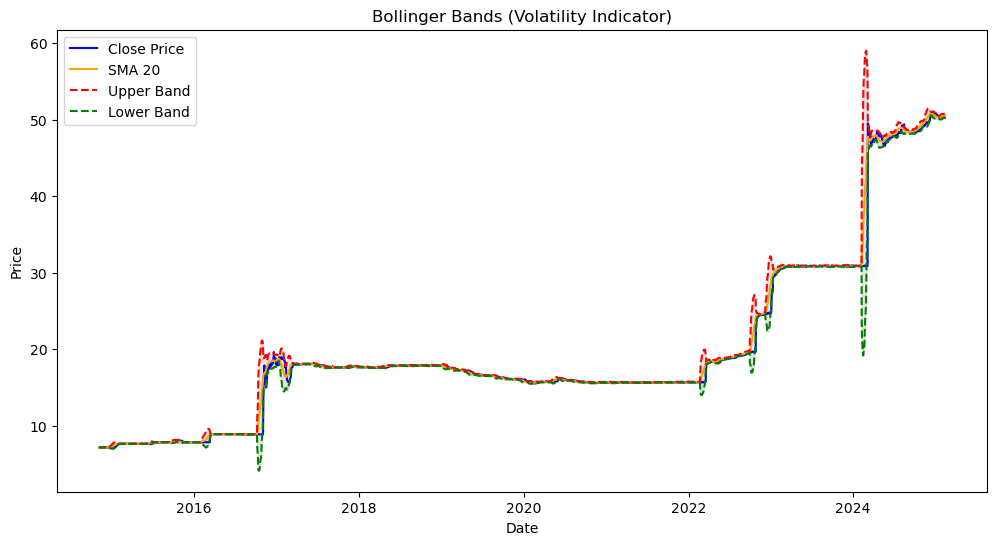

In [48]:
plt.figure(figsize=(12,6))
plt.plot(usd_egp['Date'], usd_egp['Close'], label='Close Price', color='blue')
plt.plot(usd_egp['Date'], usd_egp['SMA_20'], label='SMA 20', color='orange')
plt.plot(usd_egp['Date'], usd_egp['Upper_Band'], label='Upper Band', linestyle='dashed', color='red')
plt.plot(usd_egp['Date'], usd_egp['Lower_Band'], label='Lower Band', linestyle='dashed', color='green')
plt.fill_between(usd_egp['Date'], usd_egp['Upper_Band'], usd_egp['Lower_Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands (Volatility Indicator)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

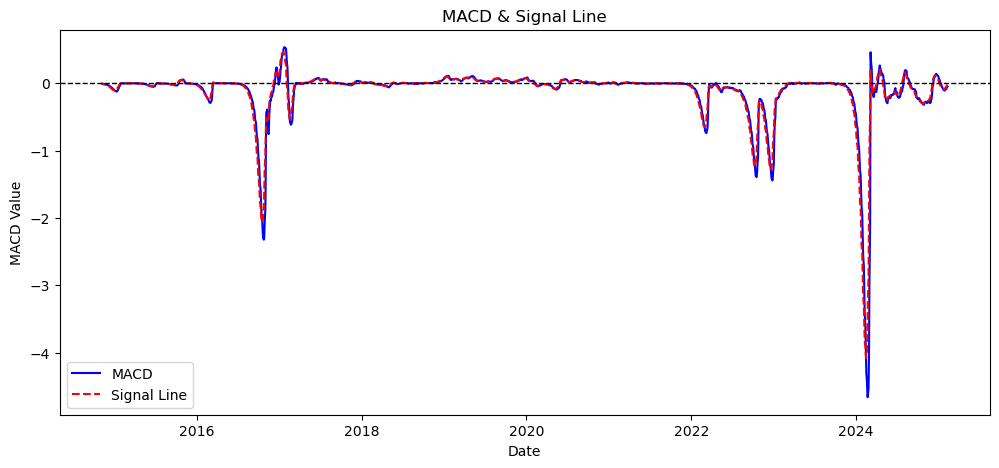

In [49]:
plt.figure(figsize=(12,5))
plt.plot(usd_egp['Date'], usd_egp['MACD'], label='MACD', color='blue')
plt.plot(usd_egp['Date'], usd_egp['Signal_Line'], label='Signal Line', color='red', linestyle='dashed')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('MACD & Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

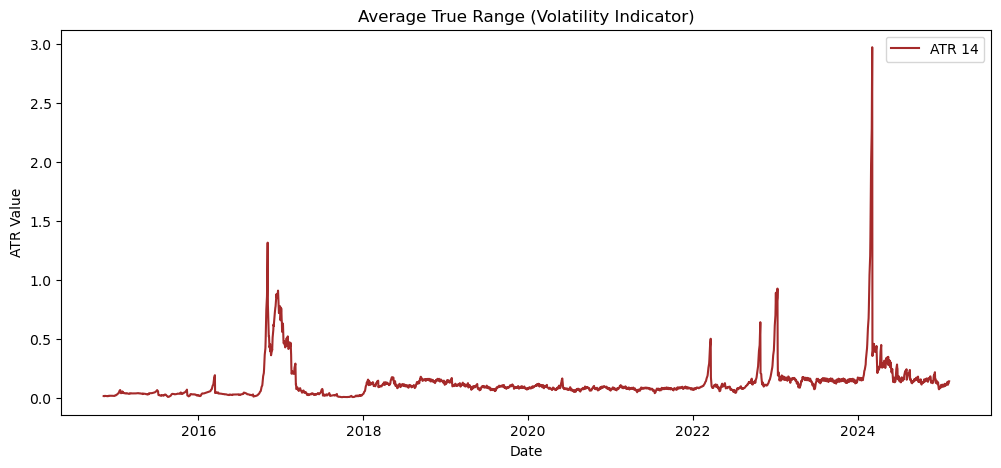

In [50]:
plt.figure(figsize=(12,5))
plt.plot(usd_egp['Date'], usd_egp['ATR_14'], label='ATR 14', color='brown')
plt.title('Average True Range (Volatility Indicator)')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.legend()
plt.show()

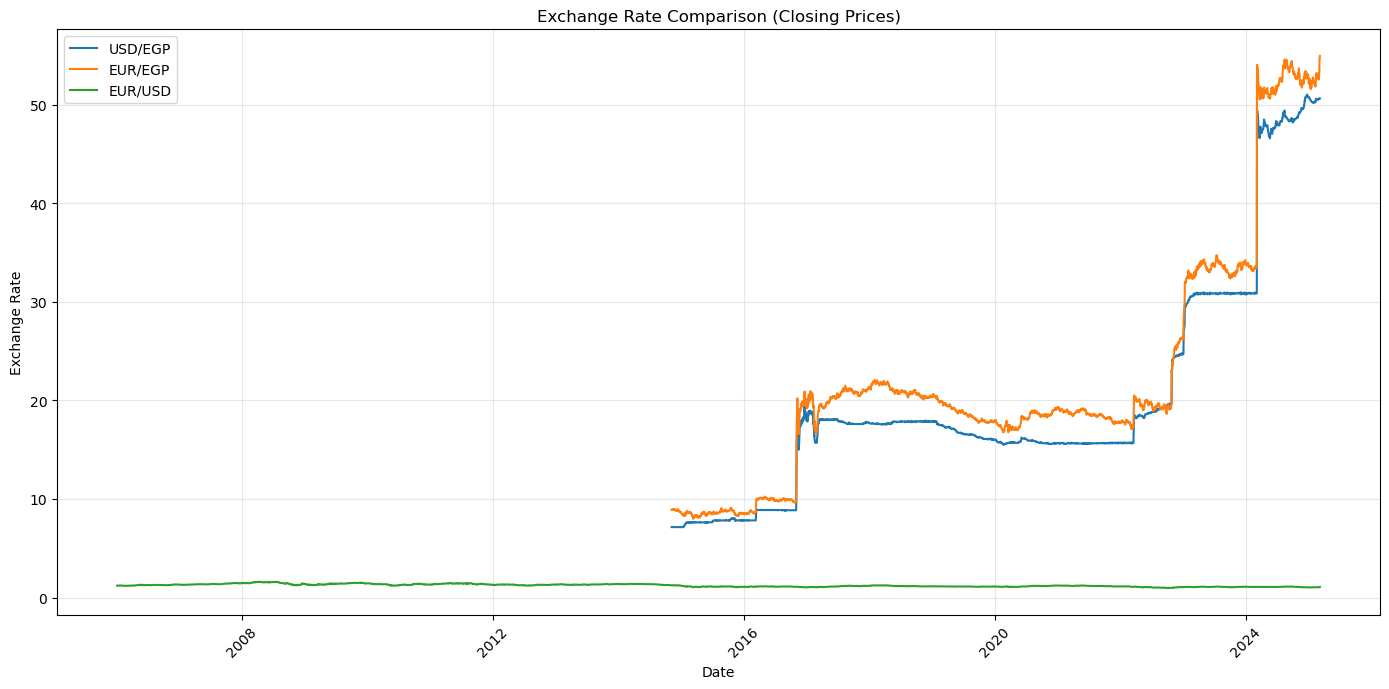

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(usd_egp.index, usd_egp['Close'], label='USD/EGP')
plt.plot(eur_egp.index, eur_egp['Close'], label='EUR/EGP')
plt.plot(eur_usd.index, eur_usd['Close'], label='EUR/USD')
plt.title('Exchange Rate Comparison (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)A
plt.tight_layout()
plt.show()

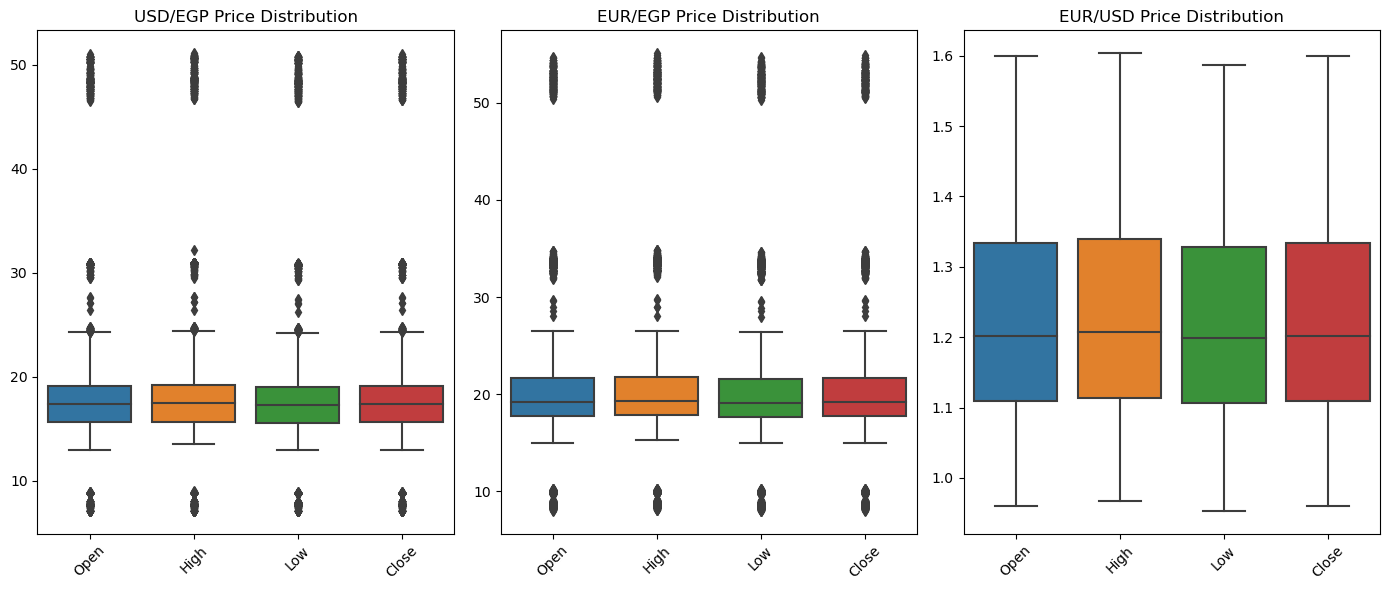

In [5]:
plt.figure(figsize=(14, 6))
for i, data in enumerate([usd_egp, eur_egp, eur_usd], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']])
    plt.title(f"{'USD/EGP' if i==1 else 'EUR/EGP' if i==2 else 'EUR/USD'} Price Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
usd_egp_weekly = usd_egp['Close'].resample('W').mean().reset_index()
eur_egp_weekly = eur_egp['Close'].resample('W').mean().reset_index() 
eur_usd_weekly = eur_usd['Close'].resample('W').mean().reset_index()


fig = px.line(usd_egp_weekly, x='Date', y='Close', title='USD/EGP Weekly Average Exchange Rate')
fig.show()

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=usd_egp_weekly['Date'], y=usd_egp_weekly['Close'], mode='lines', name='USD/EGP'))
fig.add_trace(go.Scatter(x=eur_egp_weekly['Date'], y=eur_egp_weekly['Close'], mode='lines', name='EUR/EGP'))
fig.add_trace(go.Scatter(x=eur_usd_weekly['Date'], y=eur_usd_weekly['Close'], mode='lines', name='EUR/USD'))

fig.update_layout(
    title='Weekly Average Exchange Rates',
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    legend_title='Currency Pairs',
    template='plotly_white'
)
fig.show()

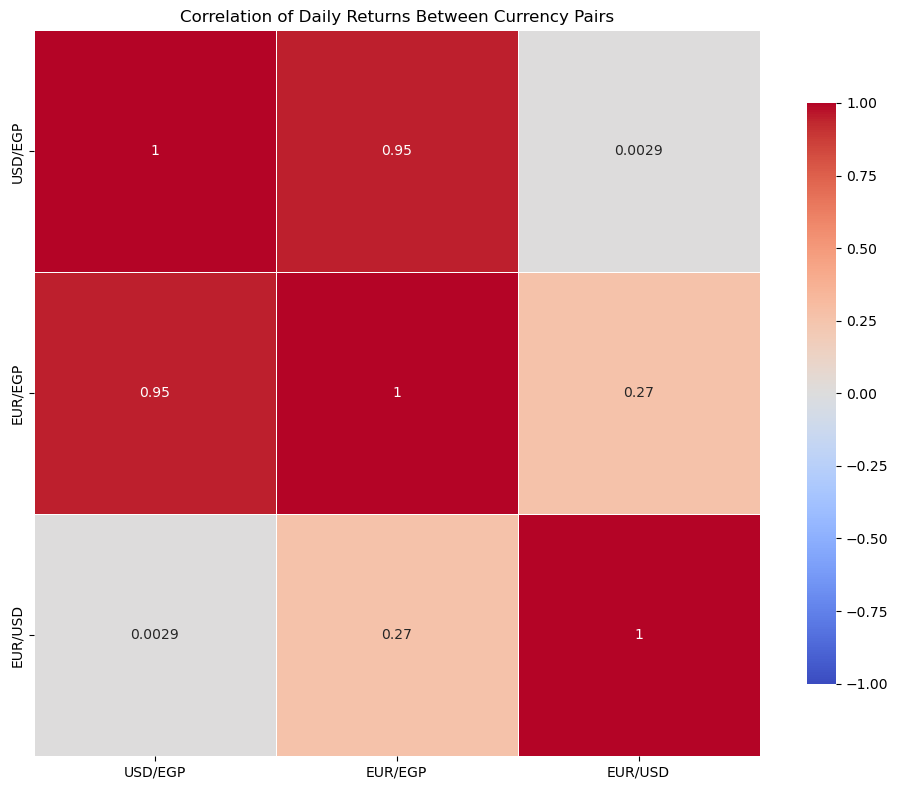

In [8]:
combined_df = pd.DataFrame({
    'USD/EGP': usd_egp['Close'],
    'EUR/EGP': eur_egp['Close'],
    'EUR/USD': eur_usd['Close']
})


returns = combined_df.pct_change().dropna()


correlation = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation of Daily Returns Between Currency Pairs')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

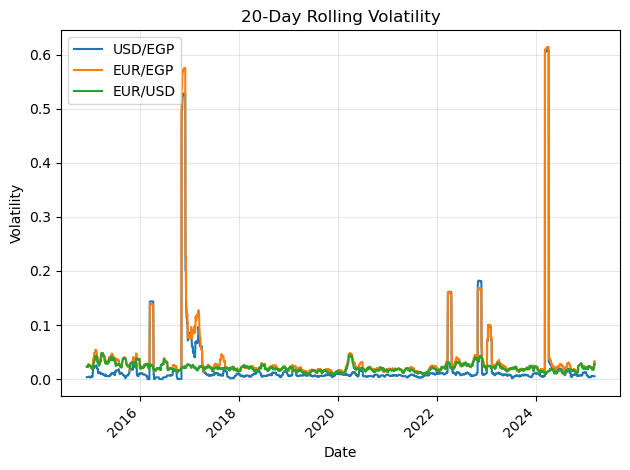

In [9]:
window = 20  # 20-day rolling window
volatility = returns.rolling(window=window).std() * np.sqrt(window)  
plt.figure(figsize=(14, 7))
volatility.plot()
plt.title(f'{window}-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()